<a href="https://colab.research.google.com/github/mlubbad/business-analysis-and-forecasting/blob/main/adidas_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let’s get started with the task of business forecasting by importing the necessary Python libraries and the dataset:

In [2]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

data = pd.read_csv("adidas quarterly sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


The dataset contains two columns; Time Period and Revenue. The Time Period column contains the quarterly revenue of Adidas from 2000 to 2021, and the Revenue column contains the sales revenue in millions (euros). Let’s have a look at the quarterly sales revenue of Adidas:

In [3]:
import plotly.express as px
figure = px.line(data, x="Time Period", 
                 y="Revenue", 
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

The sales revenue data of Adidas is seasonal as the quarterly revenue increases and decreases every quarter. Below is how we can check the seasonality of any time series data:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



<Figure size 432x288 with 0 Axes>

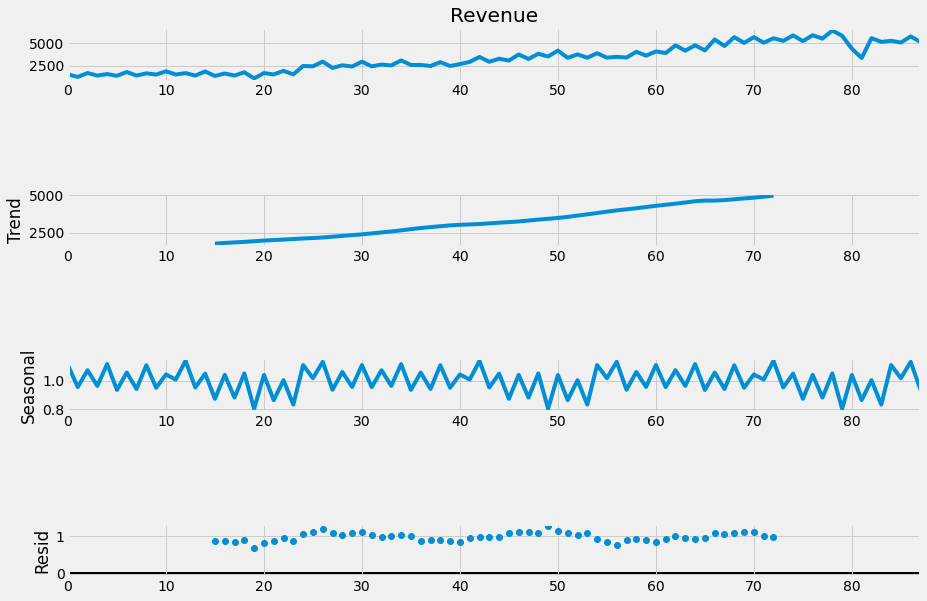

In [4]:
result = seasonal_decompose(data["Revenue"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

I will use the Seasonal ARIMA (SARIMA) model to forecast the quarterly sales revenue of Adidas. Before using the SARIMA model, it is necessary to find the p, d, and q values. You can learn how to find p, d, and q values from here.

As the data is not stationary, the value of d is 1. To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:

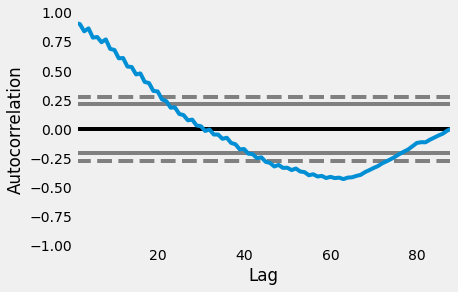

In [5]:
pd.plotting.autocorrelation_plot(data["Revenue"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

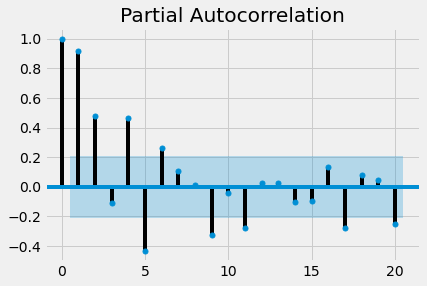

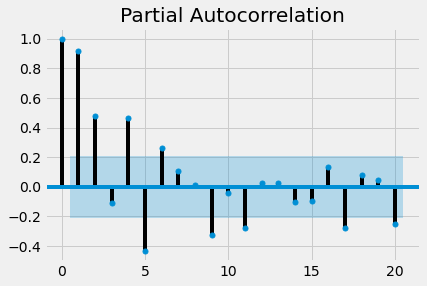

In [6]:
plot_pacf(data["Revenue"], lags = 20)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:



Now here’s how to train a SARIMA model to predict the quarterly revenue of Adidas:

In [11]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Thu, 27 Oct 2022   AIC                           1127.041
Time:                                    04:44:04   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5796      0.391     -4.044      0.000      -2.345      -0.814
ar.L2         -1.4321      0.587   

Now let’s forecast the quarterly revenue of Adidas for the next eight quarters:

In [12]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6078.793918
89    5186.311373
90    6293.196600
91    5751.905629
92    5911.946881
93    5499.784229
94    6389.627988
95    5728.806969
Name: predicted_mean, dtype: float64


Here’s how we can plot the predictions:

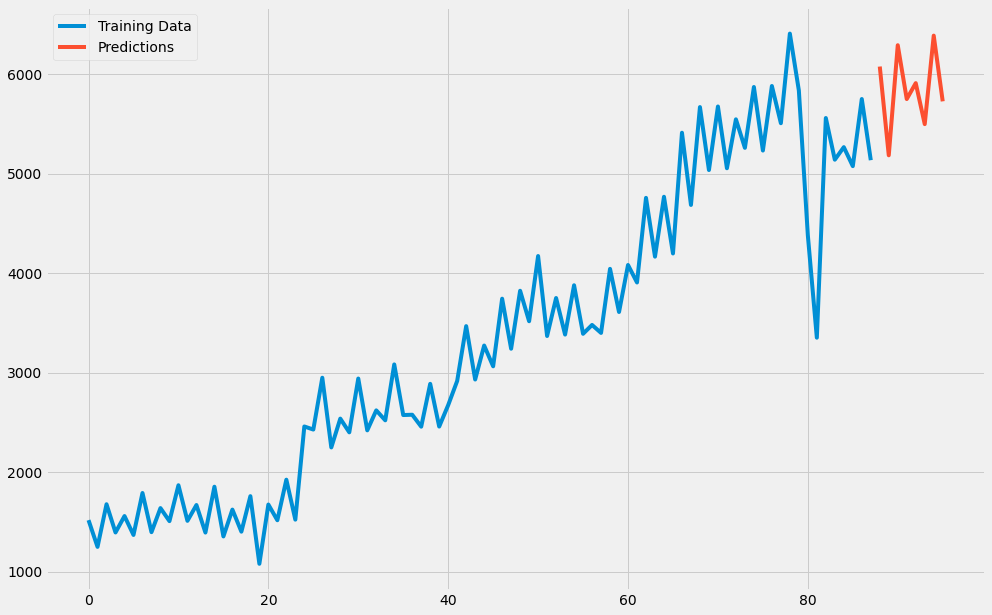

In [13]:
data["Revenue"].plot(legend=True, 
                     label="Training Data", 
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

Summary
So this is how you can perform business forecasting using the Python programming language. In Business Forecasting, we aim to forecast future sales, expenditure, or revenue by using the historical Time Series data generated by the business. I hope you liked this article on Business Forecasting using Python. Feel free to ask valuable questions in the comments section below.